**Load The Data**

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets/diamond.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length,width,depth.1
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Exploratory Data Analysis**

In [2]:
df.shape

(53940, 11)

In [3]:
df.describe()

,Unnamed: 0,carat,depth,table,price,length,width,depth.1
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   length      53940 non-null  float64
 9   width       53940 non-null  float64
 10  depth.1     53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.dtypes

,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
length,float64
width,float64


Taking only one feature

**Separate features(x) & Target(y)**

In [ ]:
x=df["carat"]
y=df["price"]

In [7]:
print(x)

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64


In [8]:
print(y)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64


**Identifying missing values**

In [9]:
df.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
length,0
width,0


**Splitting Training and testing data**

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Polynomial Feature Transformation**

In [13]:
from sklearn.preprocessing import PolynomialFeatures
degree=2
poly=PolynomialFeatures(degree=degree)
x_train_poly=poly.fit_transform(x_train.values.reshape(-1,1))
x_test_poly=poly.fit_transform(x_test.values.reshape(-1,1))


**Feature Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train_poly)
x_scaled_test=scaler.fit_transform(x_test_poly)

**Model Fitting**

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_scaled_train,y_train)

LinearRegression()

**Making Prediciton**

In [16]:
y_pred=model.predict(x_scaled_test)
print(y_pred)

[-159.97307742 2235.51663128  952.68586887 ...  323.61482725 7142.02570983
 5971.65457048]


**Model Evaluation**

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("r2_score",r2_score)

mae: 948.8626241751034
mse: 2376217.25880828
r2_score 0.8505224918016554


**Visualization**

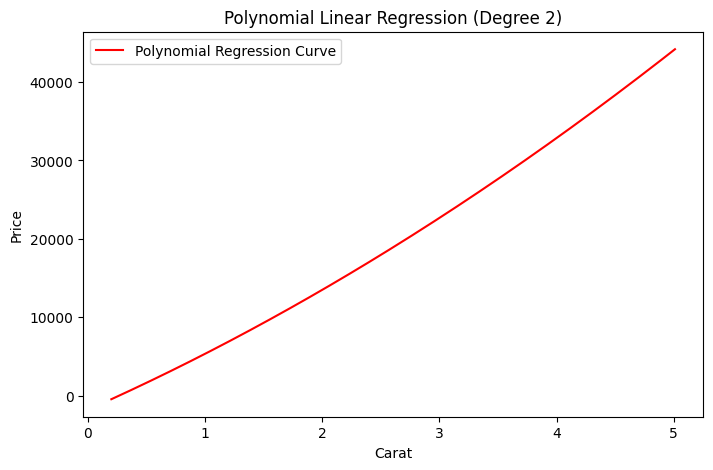

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Create smooth X values for curve
X_grid = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)

# Polynomial transformation
X_grid_poly = poly.transform(X_grid)

# Scaling
X_grid_scaled = scaler.transform(X_grid_poly)

# Prediction
y_grid_pred = model.predict(X_grid_scaled)

# Plot
plt.figure(figsize=(8, 5))

plt.plot(X_grid, y_grid_pred, label="Polynomial Regression Curve", color="red")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title(f"Polynomial Linear Regression (Degree {degree})")
plt.legend()
plt.show()
